In [366]:
import numpy as np  
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [367]:
train_por = pd.read_csv('student-por.csv')
train_mat  = pd.read_csv('student-mat.csv')

In [368]:
train_por.head()

,college,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,19,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,20,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,20,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,20,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [369]:
train_mat.head()

,college,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,21,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,20,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,19,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,19,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,19,14,19
4,GP,F,17,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [370]:
train_por.shape

(649, 33)

In [371]:
train_por.dropna().shape #no null values in train_por

(649, 33)

In [372]:
train_mat.shape

(395, 33)

In [373]:
train_mat.dropna().shape #no null values in train_mat

(395, 33)

In [374]:
subset=train_por.columns

In [375]:
train_por=train_por.drop_duplicates(subset=None, keep='first', inplace=False)
train_por.shape    #no duplicates in train_por

(649, 33)

In [376]:
subset=train_mat.columns

In [377]:
train_mat=train_mat.drop_duplicates(subset=None, keep='first', inplace=False)
train_mat.shape    #no duplicates in train_mat

(395, 33)

In [378]:
train_por['subject']='Computers'

In [379]:
train_mat['subject']='EC'

In [380]:
train=pd.concat([train_por, train_mat], axis=0) #combining two data files with subject as discriminant column to distinguish columns

In [381]:
train.head()

,college,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Computers
1,GP,F,19,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Computers
2,GP,F,20,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,Computers
3,GP,F,20,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Computers
4,GP,F,20,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Computers


In [382]:
train.to_csv('students.csv', index=False)

In [383]:
# contains all the merged data
data = pd.read_csv('students.csv')

In [384]:
data.columns

Index(['college', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'collegesup', 'famsup', 'paid', 'activities', 'cet',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject'],
      dtype='object')

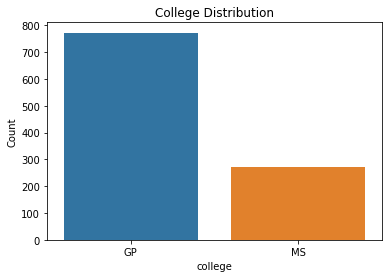

In [385]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'college', data=data, order=['GP','MS'])
ax = ax.set(ylabel="Count", xlabel="college")
figure.grid(False)
plt.title('College Distribution')
plt.savefig('college.png', bbox_inches='tight')

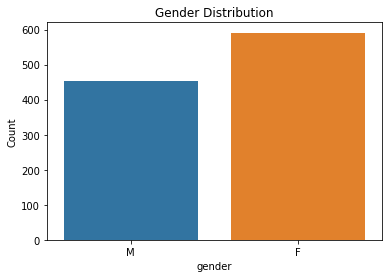

In [386]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'sex', data=data, order=['M','F'])
ax = ax.set(ylabel="Count", xlabel="gender")
figure.grid(False)
plt.title('Gender Distribution')
plt.savefig('gender.png', bbox_inches='tight')

In [387]:
data['age'].max()

22

In [388]:
data['age'].min()

17

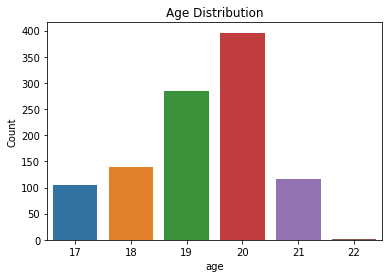

In [389]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'age', data=data, order=[17,18,19,20,21,22])
ax = ax.set(ylabel="Count", xlabel="age")
figure.grid(False)
plt.title('Age Distribution')
plt.savefig('age_plot.png', bbox_inches='tight')

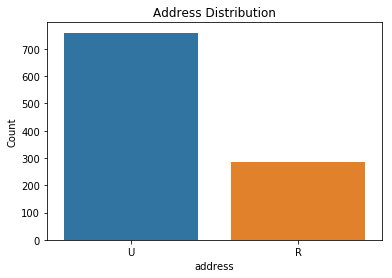

In [390]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'address', data=data, order=['U','R'])
ax = ax.set(ylabel="Count", xlabel="address")
figure.grid(False)
plt.title('Address Distribution')
plt.savefig('address_plot.png', bbox_inches='tight')

In [391]:
data['famsize'].unique()

array(['GT3', 'LE3'], dtype=object)

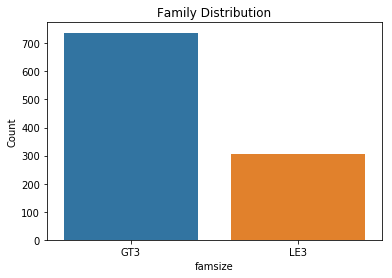

In [392]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'famsize', data=data, order=['GT3','LE3'])
ax = ax.set(ylabel="Count", xlabel="famsize")
figure.grid(False)
plt.title('Family Distribution')
plt.savefig('family_plot.png', bbox_inches='tight')

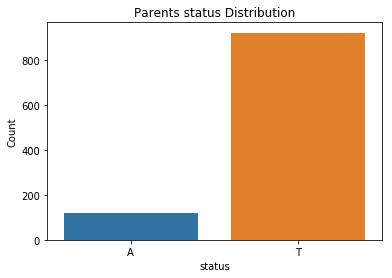

In [393]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'Pstatus', data=data, order=['A','T'])
ax = ax.set(ylabel="Count", xlabel="status")
figure.grid(False)
plt.title('Parents status Distribution')
plt.savefig('Pstatus_plot.png', bbox_inches='tight')


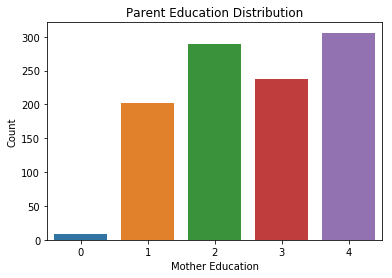

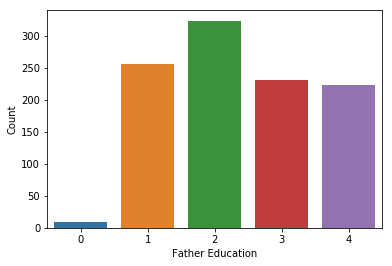

In [394]:
#(numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 
f, ax = plt.subplots()
figure = sns.countplot(x = 'Medu', data=data, order=[0,1,2,3,4])
ax = ax.set(ylabel="Count", xlabel="Mother Education")
figure.grid(False)
plt.title('Parent Education Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'Fedu', data=data, order=[0,1,2,3,4])
ax = ax.set(ylabel="Count", xlabel="Father Education")
figure.grid(False)
plt.savefig('Parent_Education_plot.png', bbox_inches='tight')


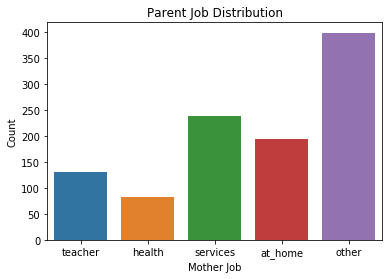

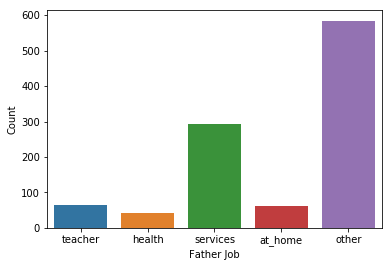

In [395]:
# (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
f, ax = plt.subplots()
figure = sns.countplot(x = 'Mjob', data=data, order=['teacher','health','services','at_home','other'])
ax = ax.set(ylabel="Count", xlabel="Mother Job")
figure.grid(False)
plt.title('Parent Job Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'Fjob', data=data, order=['teacher','health','services','at_home','other'])
ax = ax.set(ylabel="Count", xlabel="Father Job")
figure.grid(False)
plt.savefig('Parent_Job_plot.png', bbox_inches='tight')


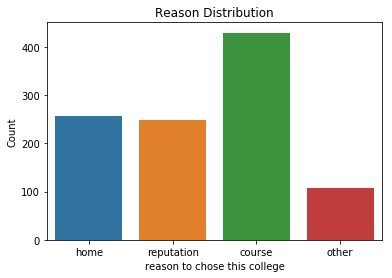

In [396]:
#(nominal: close to 'home', college 'reputation', 'course' preference or 'other')
f, ax = plt.subplots()
figure = sns.countplot(x = 'reason', data=data, order=['home','reputation','course','other'])
ax = ax.set(ylabel="Count", xlabel="reason to chose this college")
figure.grid(False)
plt.title('Reason Distribution')
plt.savefig('Reason_plot.png', bbox_inches='tight')


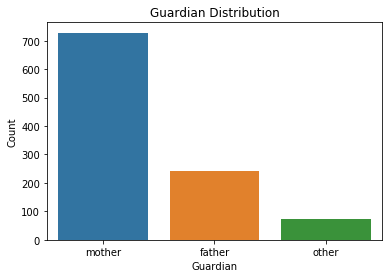

In [397]:
#(nominal: 'mother', 'father' or 'other')
f, ax = plt.subplots()
figure = sns.countplot(x = 'guardian', data=data, order=['mother','father','other'])
ax = ax.set(ylabel="Count", xlabel="Guardian")
figure.grid(False)
plt.title('Guardian Distribution')
plt.savefig('Guardian_plot.png', bbox_inches='tight')


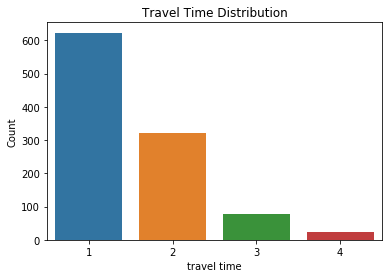

In [398]:
# (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
f, ax = plt.subplots()
figure = sns.countplot(x = 'traveltime', data=data, order=[1,2,3,4])
ax = ax.set(ylabel="Count", xlabel="travel time")
figure.grid(False)
plt.title('Travel Time Distribution')
plt.savefig('travel_time_plot.png', bbox_inches='tight')


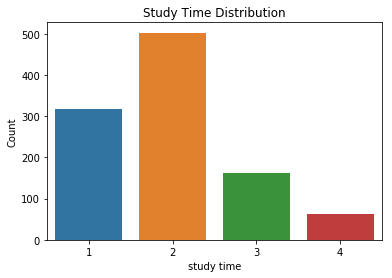

In [399]:
# (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
f, ax = plt.subplots()
figure = sns.countplot(x = 'studytime', data=data, order=[1,2,3,4])
ax = ax.set(ylabel="Count", xlabel="study time")
figure.grid(False)
plt.title('Study Time Distribution')
plt.savefig('Study_time_plot.png', bbox_inches='tight')


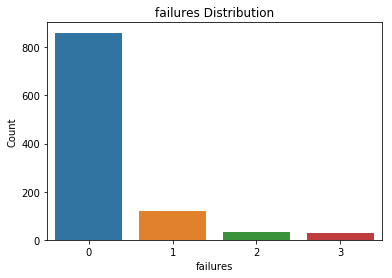

In [400]:
#(numeric: n if 1<=n<3, else 4) 
f, ax = plt.subplots()
figure = sns.countplot(x = 'failures', data=data, order=[0,1,2,3])
ax = ax.set(ylabel="Count", xlabel="failures")
figure.grid(False)
plt.title('failures Distribution')
plt.savefig('failures_plot.png', bbox_inches='tight')


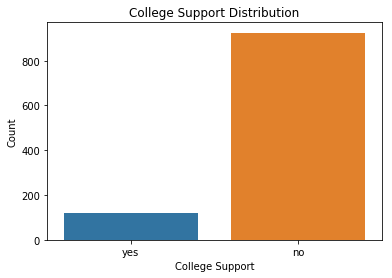

In [401]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'collegesup', data=data, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="College Support")
figure.grid(False)
plt.title('College Support Distribution')
plt.savefig('college_support_plot.png', bbox_inches='tight')


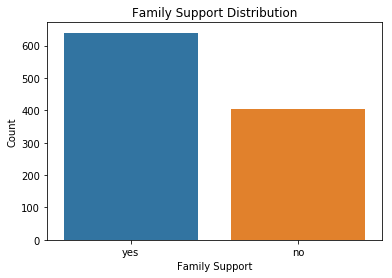

In [402]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'famsup', data=data, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="Family Support")
figure.grid(False)
plt.title('Family Support Distribution')
plt.savefig('Family_support_plot.png', bbox_inches='tight')


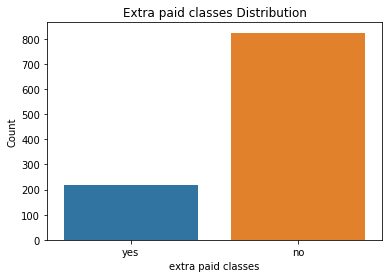

In [403]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'paid', data=data, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="extra paid classes")
figure.grid(False)
plt.title('Extra paid classes Distribution')
plt.savefig('paid_claases_plot.png', bbox_inches='tight')


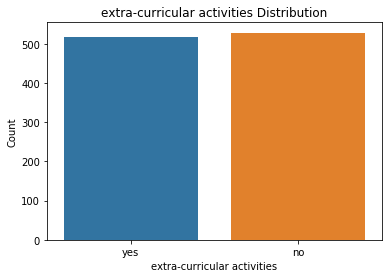

In [404]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'activities', data=data, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="extra-curricular activities")
figure.grid(False)
plt.title('extra-curricular activities Distribution')
plt.savefig('extracurricular_plot.png', bbox_inches='tight')


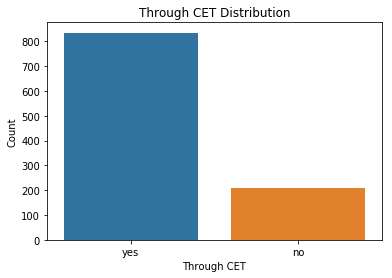

In [405]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'cet', data=data, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="Through CET")
figure.grid(False)
plt.title('Through CET Distribution')
plt.savefig('cet.png', bbox_inches='tight')


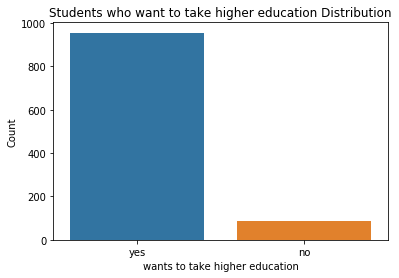

In [406]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'higher', data=data, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="wants to take higher education")
figure.grid(False)
plt.title('Students who want to take higher education Distribution')
plt.savefig('higher_education_plot.png', bbox_inches='tight')


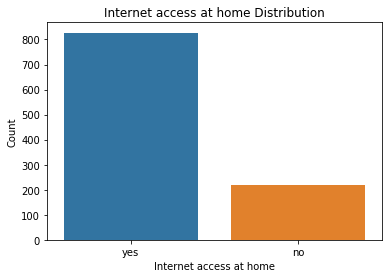

In [407]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'internet', data=data, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="Internet access at home")
figure.grid(False)
plt.title('Internet access at home Distribution')
plt.savefig('internet_plot.png', bbox_inches='tight')


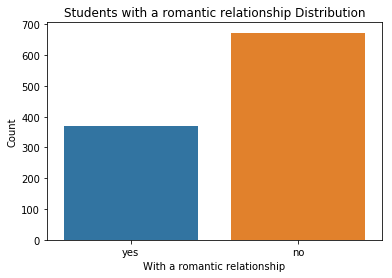

In [408]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'romantic', data=data, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="With a romantic relationship")
figure.grid(False)
plt.title('Students with a romantic relationship Distribution')
plt.savefig('rom_relationship_plot.png', bbox_inches='tight')


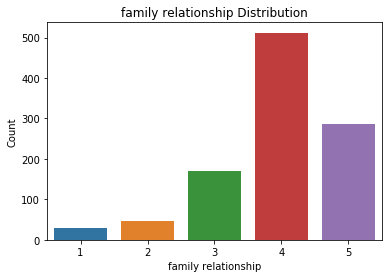

In [409]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'famrel', data=data, order=[1,2,3,4,5])
ax = ax.set(ylabel="Count", xlabel="family relationship")
figure.grid(False)
plt.title('family relationship Distribution')
plt.savefig('fam_relationship_plot.png', bbox_inches='tight')


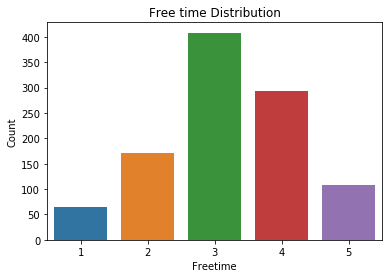

In [410]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'freetime', data=data, order=[1,2,3,4,5])
ax = ax.set(ylabel="Count", xlabel="Freetime")
figure.grid(False)
plt.title('Free time Distribution')
plt.savefig('free_time_plot.png', bbox_inches='tight')


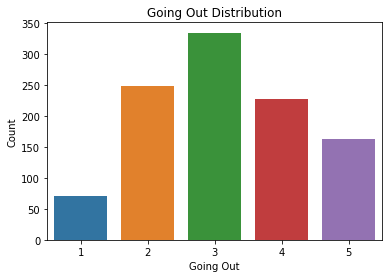

In [411]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'goout', data=data, order=[1,2,3,4,5])
ax = ax.set(ylabel="Count", xlabel="Going Out")
figure.grid(False)
plt.title('Going Out Distribution')
plt.savefig('Going_out_plot.png', bbox_inches='tight')


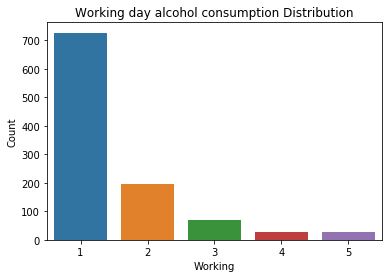

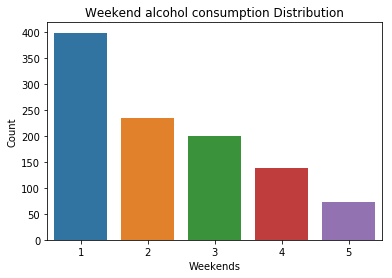

In [412]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'Dalc', data=data, order=[1,2,3,4,5])
ax = ax.set(ylabel="Count", xlabel="Working")
figure.grid(False)
plt.title('Working day alcohol consumption Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'Walc', data=data, order=[1,2,3,4,5])
ax = ax.set(ylabel="Count", xlabel="Weekends")
figure.grid(False)
plt.title('Weekend alcohol consumption Distribution')
plt.savefig('alcohol_consumption_plot.png', bbox_inches='tight')


In [413]:
# convert finalscore to categorical variable
data = pd.read_csv('students.csv')
data.head()
data['FinalGrade'] = 'na'
data.loc[(data.G3 >= 18) & (data.G3 <= 20), 'FinalGrade'] = 'Excellent'
data.loc[(data.G3 >= 15) & (data.G3 <= 17), 'FinalGrade'] = 'Good' 
data.loc[(data.G3 >= 11) & (data.G3 <= 14), 'FinalGrade'] = 'Satisfactory' 
data.loc[(data.G3 >= 6) & (data.G3 <= 10), 'FinalGrade'] = 'Poor' 
data.loc[(data.G3 >= 0) & (data.G3 <= 5), 'FinalGrade'] = 'Failure' 
data.head(5)

# data.drop(['Grade'],axis=1)



,college,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,Computers,Satisfactory
1,GP,F,19,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,Computers,Satisfactory
2,GP,F,20,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,Computers,Satisfactory
3,GP,F,20,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,Computers,Satisfactory
4,GP,F,20,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,Computers,Satisfactory


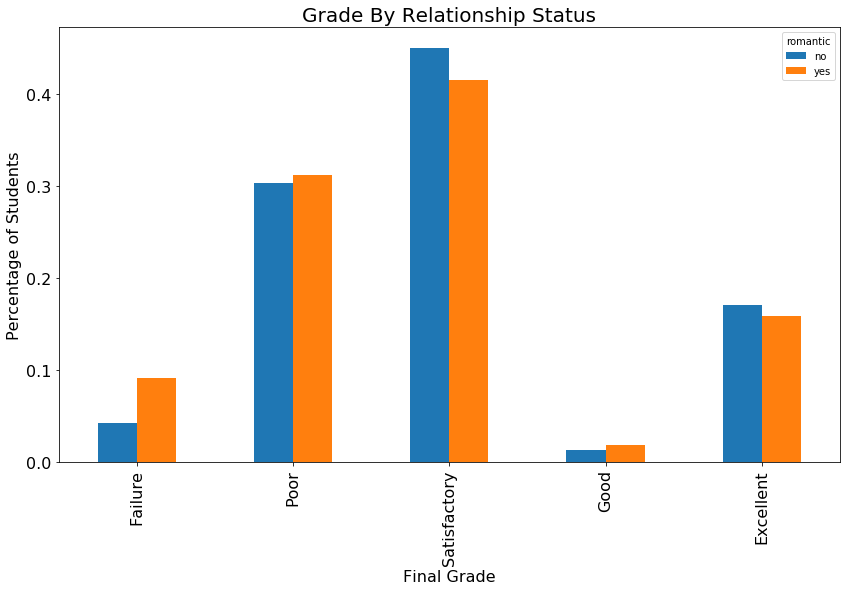

In [414]:
# relationship status
perc = (lambda col: col/col.sum())
index = ['Failure','Poor','Satisfactory','Good','Excellent']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.romantic)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Relationship Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_Relationshipstatus.png', bbox_inches='tight')
plt.show()


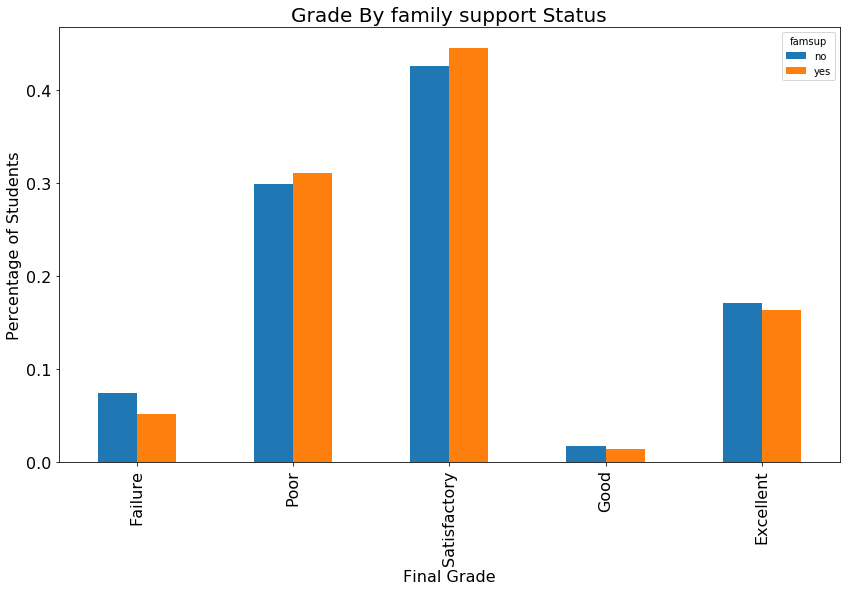

In [415]:
# relationship status
perc = (lambda col: col/col.sum())
index = ['Failure','Poor','Satisfactory','Good','Excellent']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.famsup)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By family support Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_family support.png', bbox_inches='tight')
plt.show()


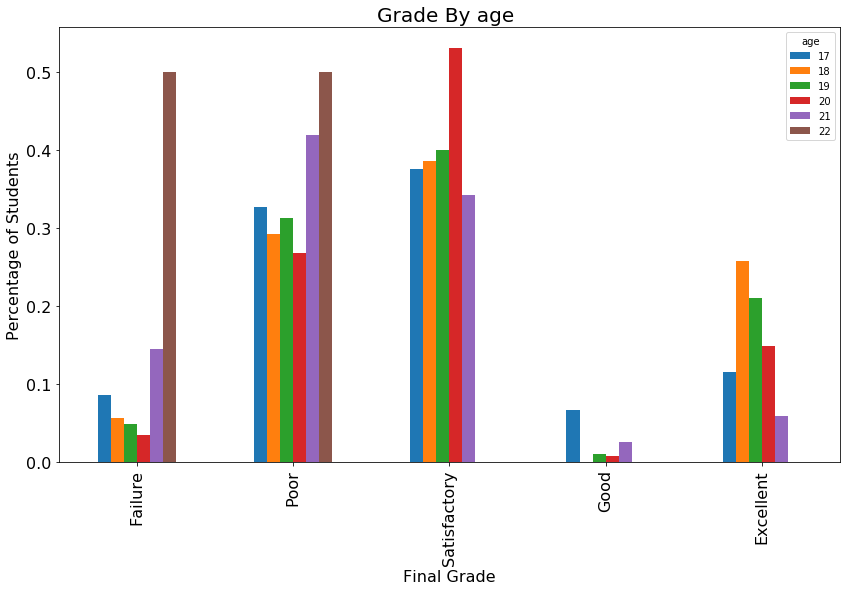

In [416]:
# relationship status
perc = (lambda col: col/col.sum())
index = ['Failure','Poor','Satisfactory','Good','Excellent']
relationship_index = pd.crosstab(index=data.FinalGrade, columns=data.age)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By age ', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_Age.png', bbox_inches='tight')
plt.show()


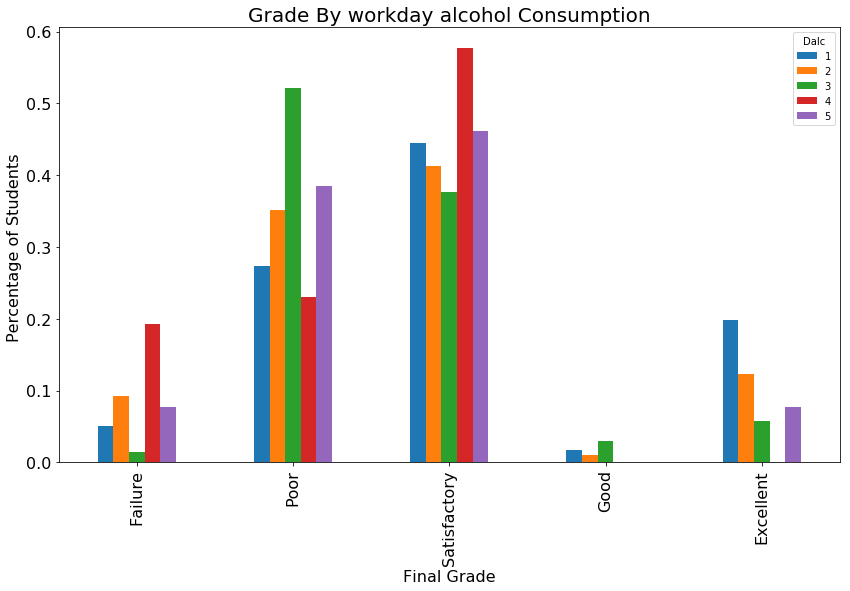

In [417]:
# Dalc - workday alcohol consumption
alcohol_index = pd.crosstab(index=data.FinalGrade, columns=data.Dalc)
workday_alcohol_index = alcohol_index.apply(perc).reindex(index)
workday_alcohol_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By workday alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Students ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_workday_alchol.png', bbox_inches='tight')
plt.show()


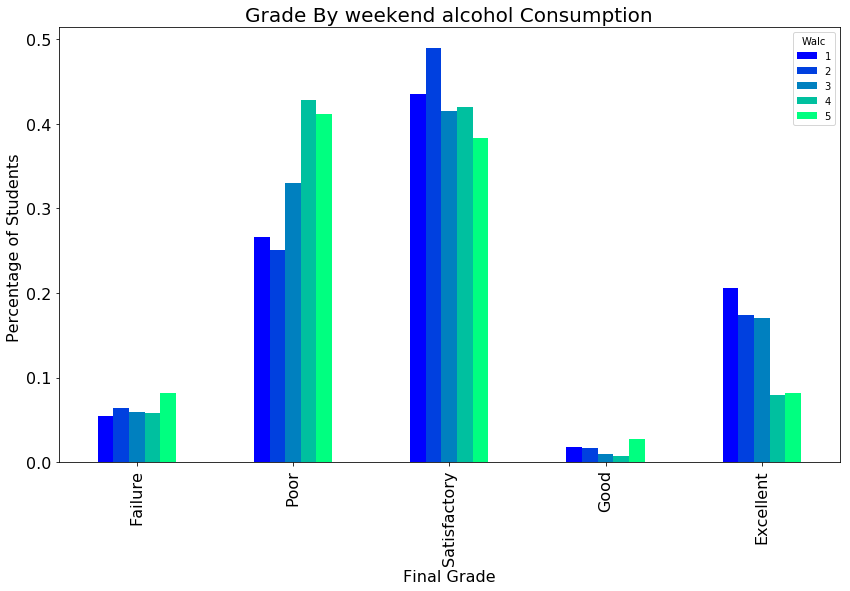

In [418]:
# Walc - weekday alcohol consumption
alcohol_index = pd.crosstab(index=data.FinalGrade, columns=data.Walc)
weekend_alcohol_index = alcohol_index.apply(perc).reindex(index)

weekend_alcohol_index.plot.bar(colormap='winter',fontsize=16, figsize=(14,8))
plt.title('Grade By weekend alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Students ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_weekend_alchol.png', bbox_inches='tight')
plt.show()


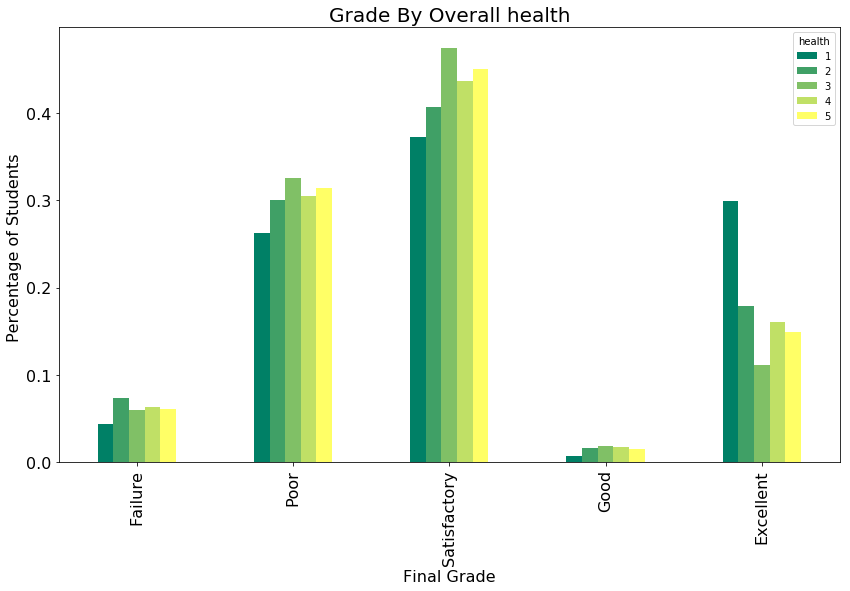

In [419]:
# health - current health status
health_index = pd.crosstab(index=data.FinalGrade, columns=data.health)
Overall_health_index = health_index.apply(perc).reindex(index)

Overall_health_index.plot.bar(colormap='summer',fontsize=16, figsize=(14,8))
plt.title('Grade By Overall health', fontsize=20)
plt.ylabel('Percentage of Students ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_overall_health.png', bbox_inches='tight')
plt.show()


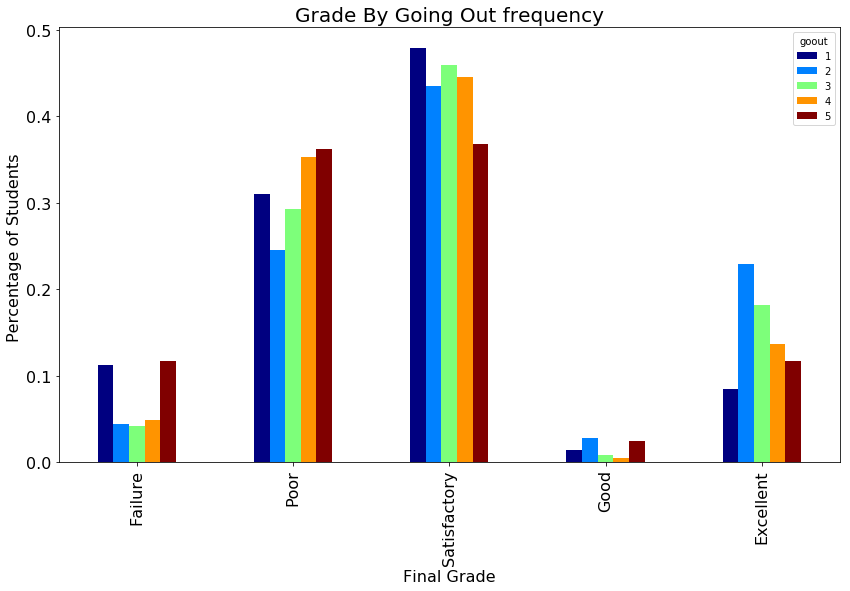

In [420]:
# goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
goout_index = pd.crosstab(index=data.FinalGrade, columns=data.goout)
Overall_goout_index = goout_index.apply(perc).reindex(index)
Overall_goout_index.plot.bar(colormap='jet',fontsize=16, figsize=(14,8))
plt.title('Grade By Going Out frequency', fontsize=20)
plt.ylabel('Percentage of Students ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_going_out.png', bbox_inches='tight')
plt.show()


In [421]:
#absences - number of college absences (numeric: from 0 to 93) 
data.head()
data['Regularity'] = 'na'
data.loc[(data.absences >= 0) & (data.absences <= 9), 'Regularity'] = 'Always Regular'
data.loc[(data.absences >= 10) & (data.absences <= 29), 'Regularity'] = 'Mostly Regular' 
data.loc[(data.absences >= 30) & (data.absences <= 49), 'Regularity'] = 'Regular' 
data.loc[(data.absences >= 50) & (data.absences <= 79), 'Regularity'] = 'Irregular' 
data.loc[(data.absences >= 80)& (data.absences <= 93), 'Regularity'] = 'Highly Irregular'
data.head()

,college,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade,Regularity
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,4,0,11,11,Computers,Satisfactory,Always Regular
1,GP,F,19,U,GT3,T,1,1,at_home,other,...,1,1,3,2,9,11,11,Computers,Satisfactory,Always Regular
2,GP,F,20,U,LE3,T,1,1,at_home,other,...,2,3,3,6,12,13,12,Computers,Satisfactory,Always Regular
3,GP,F,20,U,GT3,T,4,2,health,services,...,1,1,5,0,14,14,14,Computers,Satisfactory,Always Regular
4,GP,F,20,U,GT3,T,3,3,other,other,...,1,2,5,0,11,13,13,Computers,Satisfactory,Always Regular


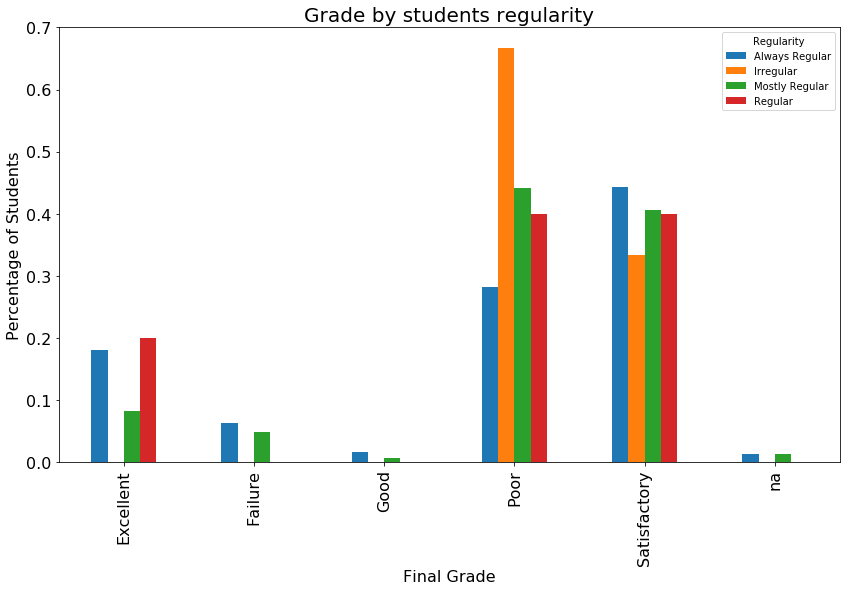

<Figure size 432x288 with 0 Axes>

In [422]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
absences = pd.crosstab(index=data.FinalGrade, columns=data.Regularity)
absences = perc(absences)
absences.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by students regularity', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()
plt.savefig('Grade_regularity.png', bbox_inches='tight')



In [423]:
# 31 G1 - first period grade (numeric: from 0 to 20)
# 31 G2 - second period grade (numeric: from 0 to 20)
# 32 G3 - final grade (numeric: from 0 to 20, output target)

In [424]:
data['Grade1'] = 'na'
data.loc[(data.G1 >= 18) & (data.G1 <= 20), 'Grade1'] = 'Excellent'
data.loc[(data.G1 >= 15) & (data.G1 <= 17), 'Grade1'] = 'Good' 
data.loc[(data.G1 >= 11) & (data.G1 <= 14), 'Grade1'] = 'Satisfactory' 
data.loc[(data.G1 >= 6) & (data.G1 <= 10), 'Grade1'] = 'Poor' 
data.loc[(data.G1 >= 0) & (data.G1 <= 5), 'Grade1'] = 'Failure' 

data['Grade2'] = 'na'
data.loc[(data.G2 >= 18) & (data.G2 <= 20), 'Grade2'] = 'Excellent'
data.loc[(data.G2 >= 15) & (data.G2 <= 17), 'Grade2'] = 'Good' 
data.loc[(data.G2 >= 11) & (data.G2 <= 14), 'Grade2'] = 'Satisfactory' 
data.loc[(data.G2 >= 6) & (data.G2 <= 10), 'Grade2'] = 'Poor' 
data.loc[(data.G2 >= 0) & (data.G2 <= 5), 'Grade2'] = 'Failure' 

data.head(5)

,college,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,0,11,11,Computers,Satisfactory,Always Regular,Failure,Satisfactory
1,GP,F,19,U,GT3,T,1,1,at_home,other,...,3,2,9,11,11,Computers,Satisfactory,Always Regular,Poor,Satisfactory
2,GP,F,20,U,LE3,T,1,1,at_home,other,...,3,6,12,13,12,Computers,Satisfactory,Always Regular,Satisfactory,Satisfactory
3,GP,F,20,U,GT3,T,4,2,health,services,...,5,0,14,14,14,Computers,Satisfactory,Always Regular,Satisfactory,Satisfactory
4,GP,F,20,U,GT3,T,3,3,other,other,...,5,0,11,13,13,Computers,Satisfactory,Always Regular,Satisfactory,Satisfactory


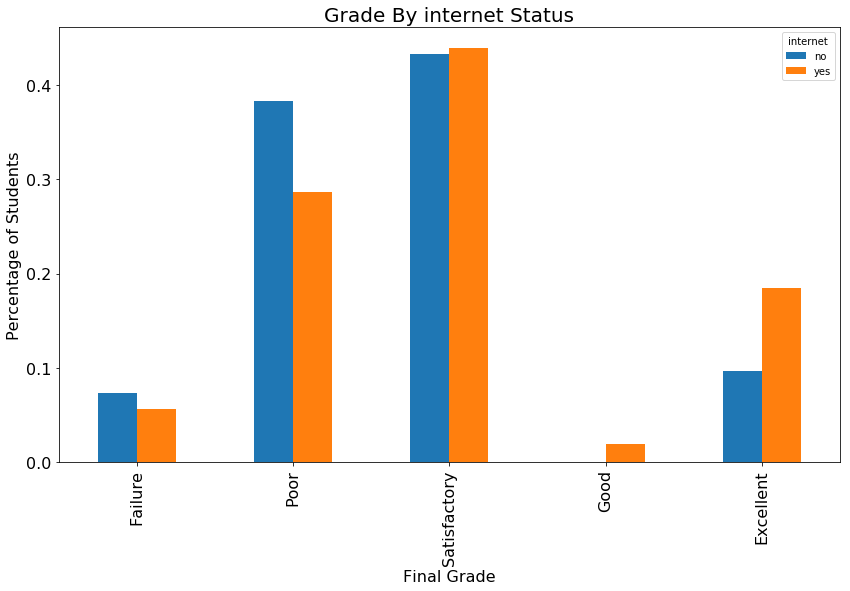

In [425]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
internet_index = pd.crosstab(index=data.FinalGrade, columns=data.internet)
internet_index = internet_index.apply(perc).reindex(index)
internet_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By internet Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_internet_status.png', bbox_inches='tight')

plt.show()


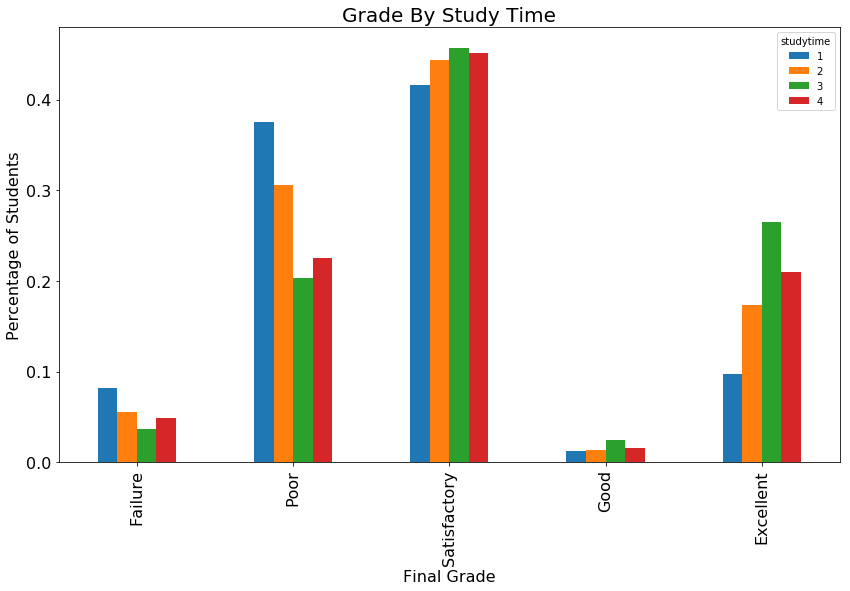

In [426]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
studytime_index = pd.crosstab(index=data.FinalGrade, columns=data.studytime)
studytime_index = studytime_index.apply(perc).reindex(index)
studytime_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Study Time', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_study_time.png', bbox_inches='tight')

plt.show()


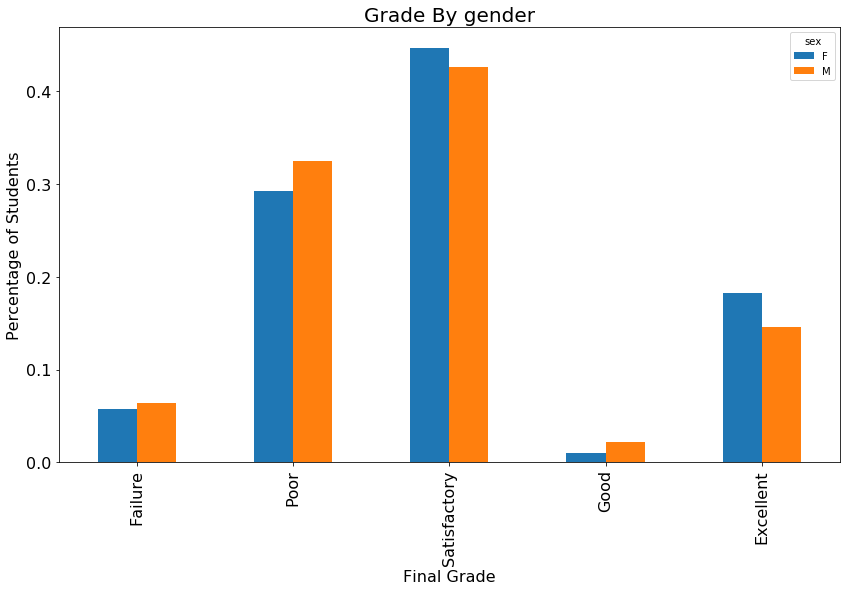

In [427]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
gender_index = pd.crosstab(index=data.FinalGrade, columns=data.sex)
gender_index = gender_index.apply(perc).reindex(index)
gender_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By gender', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_gender.png', bbox_inches='tight')

plt.show()



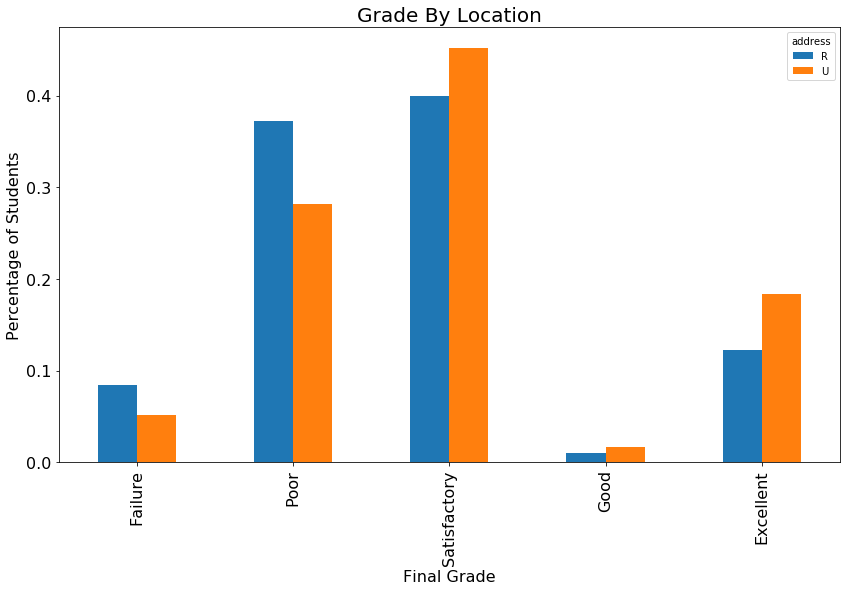

In [428]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
Location_index = pd.crosstab(index=data.FinalGrade, columns=data.address)
Location_index = Location_index.apply(perc).reindex(index)
Location_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Location', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_location.png', bbox_inches='tight')

plt.show()


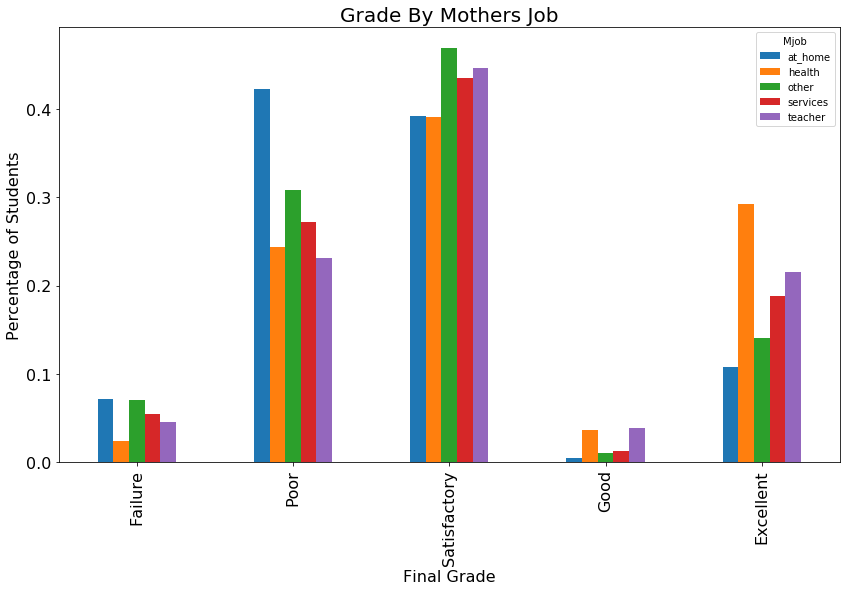

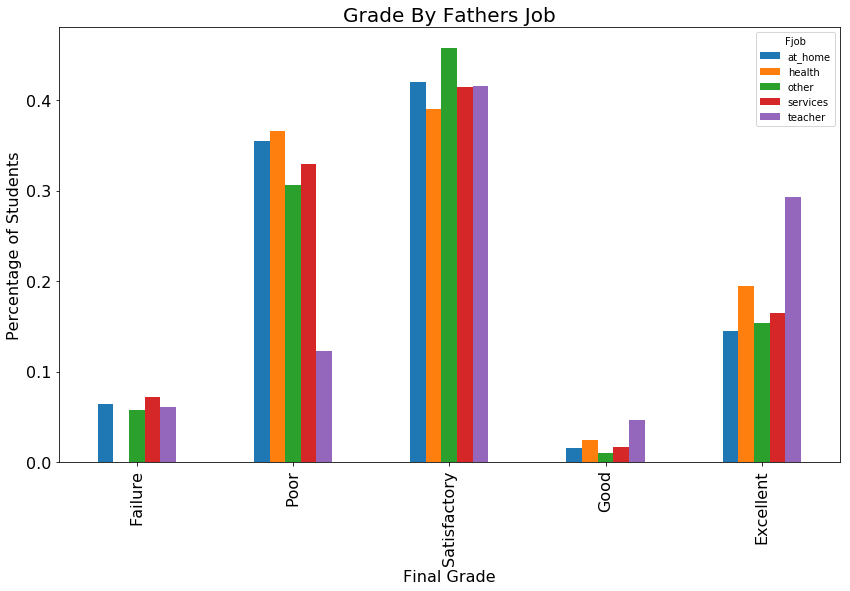

In [429]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
Mothers_index = pd.crosstab(index=data.FinalGrade, columns=data.Mjob)
Mothers_index = Mothers_index.apply(perc).reindex(index)
Mothers_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Mothers Job', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

index = ['Failure','Poor','Satisfactory','Good','Excellent']
Fathers_index = pd.crosstab(index=data.FinalGrade, columns=data.Fjob)
Fathers_index = Fathers_index.apply(perc).reindex(index)
Fathers_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Fathers Job', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_mothers_fathers_job.png', bbox_inches='tight')

plt.show()


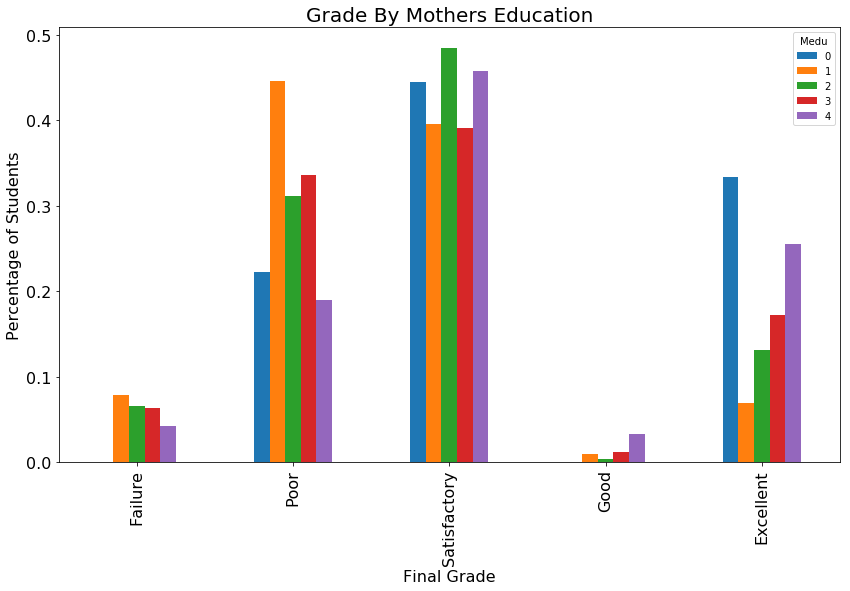

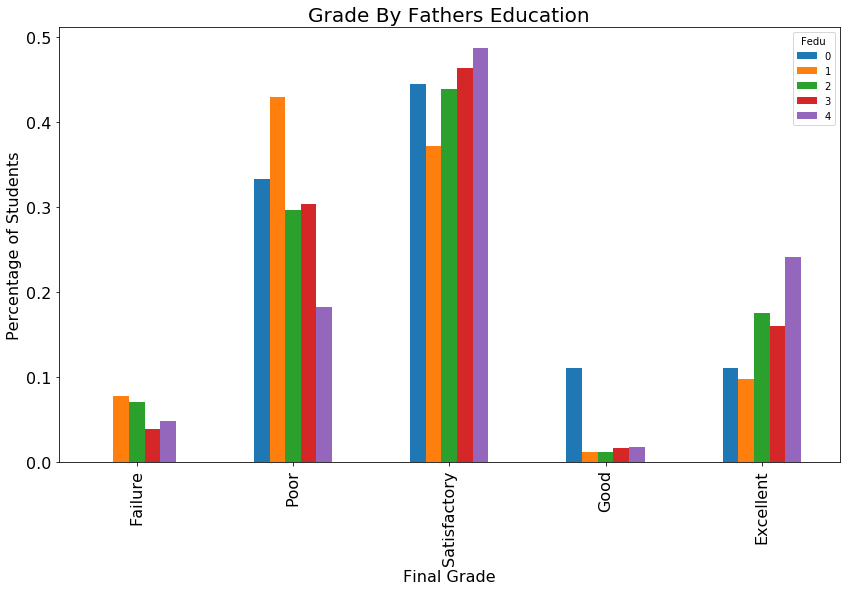

In [430]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
Mothers_index = pd.crosstab(index=data.FinalGrade, columns=data.Medu)
Mothers_index = Mothers_index.apply(perc).reindex(index)
Mothers_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Mothers Education', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

index = ['Failure','Poor','Satisfactory','Good','Excellent']
Fathers_index = pd.crosstab(index=data.FinalGrade, columns=data.Fedu)
Fathers_index = Fathers_index.apply(perc).reindex(index)
Fathers_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Fathers Education', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_mothers_fathers_edu.png', bbox_inches='tight')

plt.show()


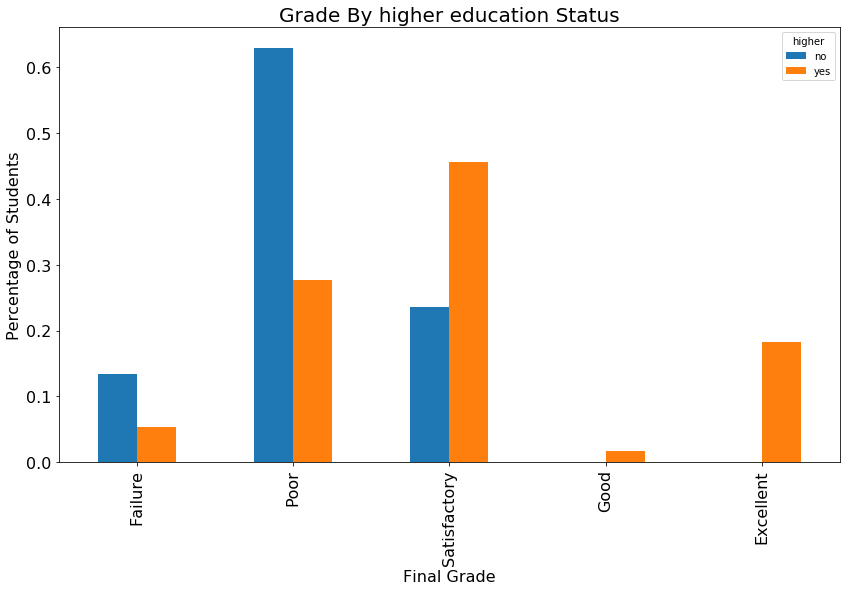

In [431]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
higher_index = pd.crosstab(index=data.FinalGrade, columns=data.higher)
higher_index = higher_index.apply(perc).reindex(index)
higher_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By higher education Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_mhigher_education_status.png', bbox_inches='tight')

plt.show()


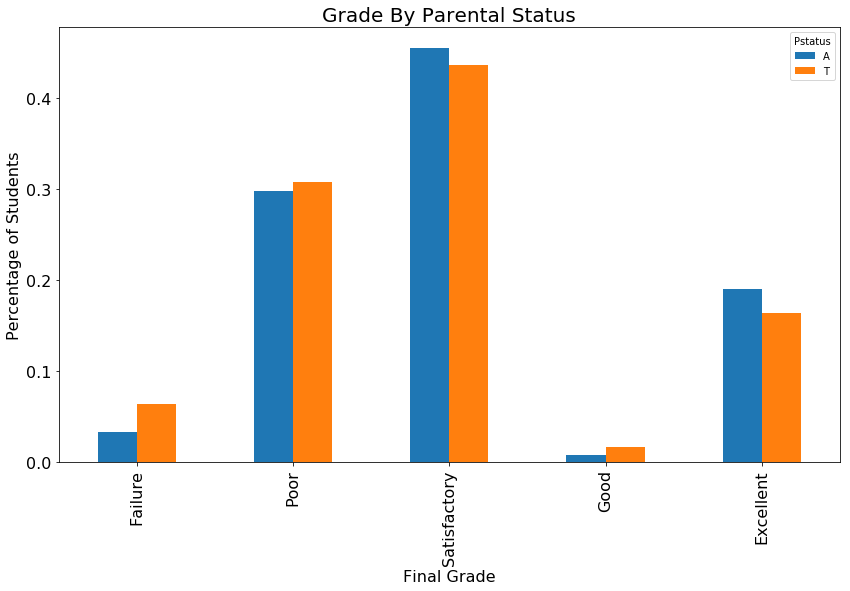

In [432]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
status_index = pd.crosstab(index=data.FinalGrade, columns=data.Pstatus)
status_index = status_index.apply(perc).reindex(index)
status_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Parental Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_Parental_status.png', bbox_inches='tight')

plt.show()


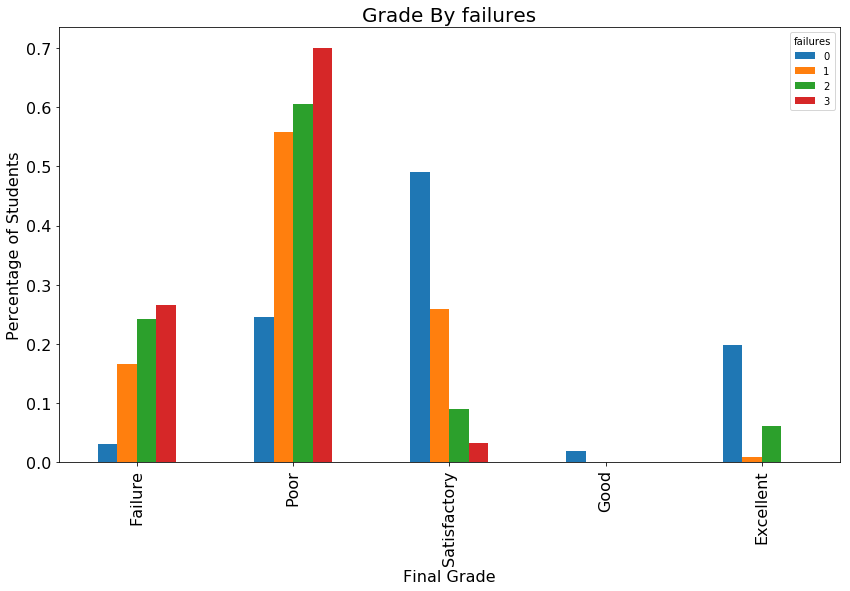

In [433]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
status_index = pd.crosstab(index=data.FinalGrade, columns=data.failures)
status_index = status_index.apply(perc).reindex(index)
status_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By failures', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_Failure_status.png', bbox_inches='tight')

plt.show()

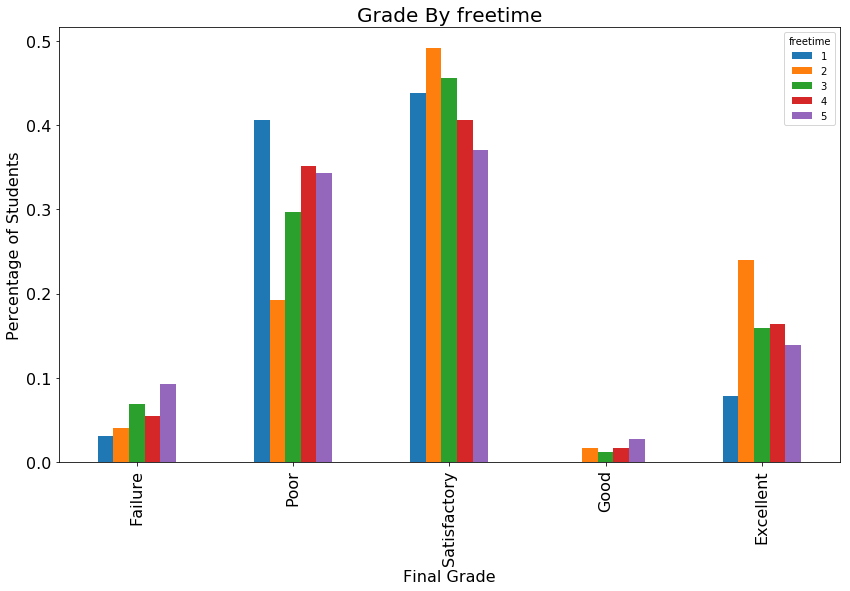

In [434]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
status_index = pd.crosstab(index=data.FinalGrade, columns=data.freetime)
status_index = status_index.apply(perc).reindex(index)
status_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By freetime', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_freetime_status.png', bbox_inches='tight')

plt.show()

In [435]:
data.head()

,college,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,0,11,11,Computers,Satisfactory,Always Regular,Failure,Satisfactory
1,GP,F,19,U,GT3,T,1,1,at_home,other,...,3,2,9,11,11,Computers,Satisfactory,Always Regular,Poor,Satisfactory
2,GP,F,20,U,LE3,T,1,1,at_home,other,...,3,6,12,13,12,Computers,Satisfactory,Always Regular,Satisfactory,Satisfactory
3,GP,F,20,U,GT3,T,4,2,health,services,...,5,0,14,14,14,Computers,Satisfactory,Always Regular,Satisfactory,Satisfactory
4,GP,F,20,U,GT3,T,3,3,other,other,...,5,0,11,13,13,Computers,Satisfactory,Always Regular,Satisfactory,Satisfactory


In [436]:
data.columns

Index(['college', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'collegesup', 'famsup', 'paid', 'activities', 'cet',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject', 'FinalGrade',
       'Regularity', 'Grade1', 'Grade2'],
      dtype='object')

In [437]:
data.shape

(1044, 38)

In [438]:
data.to_csv('features.csv', index=False)